# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/logan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


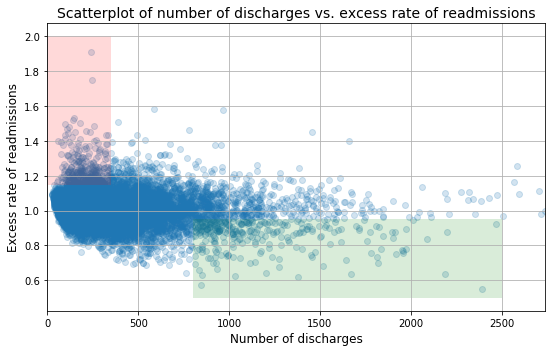

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I do agree with the initial observations that overall, the rate of readmissions is trending down with increasing number of discharges (although very slightly), and with lower number of discharges, there is a greater incidence of excess rate of readmissions. However I don't entirely agree with the third point they make that with higher number of discharges there is a greater incidence of lower rates of readmissions. It seems to me there is a greater incident of lower rates of readmission after a certain point, say around 750 discharges, but the incidences of lower rates after that point don't seem to increase with the number of discharges.

In addition, I would disagree with one of the conclusions that there is a significant correlation between hospital capacity (number of discharges) and readmission rates. Looking at the plot it looks like there may be a slight correlation if any but definitely not a significant one.

Let's do a hypothesis test of correlation to see if there is a significant correlation between Number of Discharges (x) and Excess Readmission Ratio (y). Our null hypothesis for this test will be that the two variables, excess rate of readmission and numbers of discharges are completely uncorrelated.

In [5]:
def pearson_r(x,y):
    '''computes pearson correlation between variables x and y'''
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [6]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)

# Initialize permutation replicates: perm_replicates
perm_reps = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    x_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_reps[i] = pearson_r(x_permuted, y)

# Compute and print p-value, 95% confidence interval, and margin of error
p = np.sum(perm_reps >= r_obs) / len(perm_reps)
conf_int = np.percentile(perm_reps, [2.5, 97.5])
moe = (conf_int[1] - conf_int[0])/2

print('p-value =', p)
print('95% CI: [{:.4f}, {:.4f}]'.format(conf_int[0], conf_int[1]))
print('Margin of Error: {:.4f}'.format(moe))

p-value = 1.0
95% CI: [-0.0179, 0.0186]
Margin of Error: 0.0182


Since the p-value is much much greater than the alpha level of 0.01, this shows us that the null hypothesis is true and that the correlation between the two variables, Number of Discharges (x) and Excess Readmission Ratio (y) is not statistical significant. Since there is no statistical significance, it does not make practical sense to 
make hospitals/facilties with small capacity (< 300) required to demonstrate upgraded resource allocation for quality care to continue operation.

Let's verify the statistics that they did in section B. of the preliminary report:

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [7]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


Looks like not all of the entries of the 'Number of Discharges' column are numeric. Let's take a closer look at that column.

In [8]:
hospital_read_df['Number of Discharges']

0                  242
1                  247
2                  586
3                  965
4                  149
5                  141
6                  390
7                  178
8                   98
9                  256
10                 121
11                 108
12                 780
13                 216
14                1458
15                 238
16                 154
17                 117
18                 322
19                  98
20                 493
21                 332
22                 136
23                 179
24                  97
25                 536
26                 268
27                1658
28                 260
29                  57
             ...      
16830    Not Available
16831    Not Available
16832    Not Available
16833    Not Available
16834    Not Available
16835    Not Available
16836    Not Available
16837    Not Available
16838    Not Available
16839    Not Available
16840    Not Available
16841    Not Available
16842    No

Looks like there are many hospitals that don't have the number of discharges available. Let's go ahead and convert all the numbers in this column to numeric and all other entries to NaN.

In [9]:
hospital_read_df['Number of Discharges'] = pd.to_numeric(hospital_read_df['Number of Discharges'], errors='coerce')

In [10]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          11578 non-null float64
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Great, now we can verify the stats on this column.

In [11]:
mean_100 = np.mean(hospital_read_df[hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'])
ratio_100 = (hospital_read_df[hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'] > 1).sum() / \
len(hospital_read_df[hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'])

print('Mean excess readmission rate in hospitals/facilities with number of discharges < 100: {:.3f}'.format(mean_100))
print('Percent excess readmission rate greater than 1 in hospitals/facilities with number of discharges < 100: {:.3f}'.format(ratio_100))

Mean excess readmission rate in hospitals/facilities with number of discharges < 100: 1.023
Percent excess readmission rate greater than 1 in hospitals/facilities with number of discharges < 100: 0.592


In [12]:
mean_1000 = np.mean(hospital_read_df[hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'])
ratio_1000 = (hospital_read_df[hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'] > 1).sum() / \
len(hospital_read_df[hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'])


print('Mean excess readmission rate, in hospitals/facilities with number of discharges > 1000: {:.3f}'.format(mean_1000))
print('Percent excess readmission rate greater than 1 in hospitals/facilities with number of discharges > 1000: {:.3f}'.format(ratio_1000))

Mean excess readmission rate, in hospitals/facilities with number of discharges > 1000: 0.978
Percent excess readmission rate greater than 1 in hospitals/facilities with number of discharges > 1000: 0.445


Looks like all the stats are the same except for the 'Percent excess readmission rate greater than 1 in hospitals/facilities with number of discharges < 100', in which the preliminary report calculated 63% and here we calculated 59%.

As you can see, it is not always easy to tell if there is a correlation based only on scatter plots such as the one shown in the preliminary report. Let's use a more simplified scatter plot to see if we can convey the same information in a more direct manner.

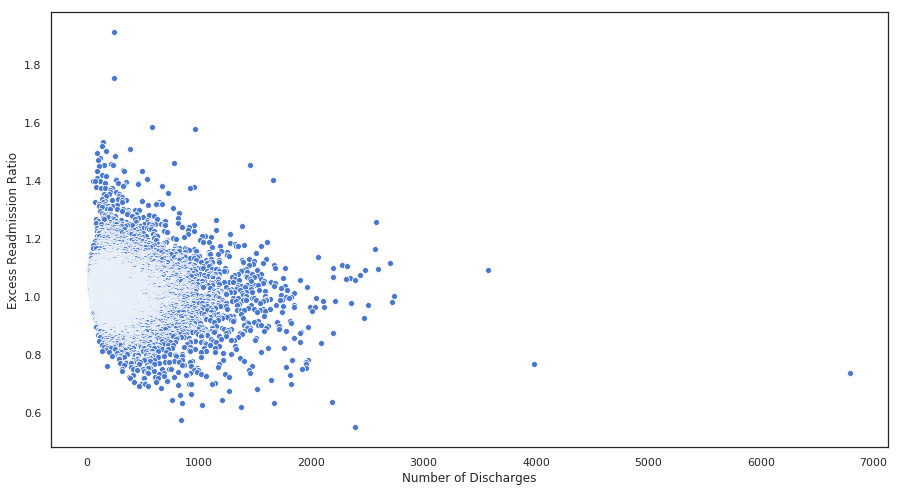

In [31]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=hospital_read_df, ax=ax)